<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/StatModRef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
x = np.array([46, 60, 66, 68, 71, 78, 82, 90])
y = np.array([45, 69, 59, 49, 54, 70, 58, 75])

Корреляция Пирсона

In [ ]:
def corr_pearson_1(x, y):
  sum_xy = np.sum(x*y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x**2)
  sum_y2 = np.sum(y**2)
  n = len(x)
  return (n*sum_xy - sum_x*sum_y) / (np.sqrt((n*sum_x2-sum_x**2)*(n*sum_y2-sum_y**2)))

In [ ]:
corr_pearson_1(x, y)

0.6352281385376137

In [ ]:
def corr_pearson_2(x, y):
  x_std = np.std(x, ddof=1)
  y_std = np.std(y, ddof=1)
  cov_ = np.cov(x, y)[0, 1]
  return cov_ / (x_std*y_std)

In [ ]:
corr_pearson_2(x, y)

0.6352281385376137

Коэффициент корреляции Спирмана

In [ ]:
def corr_spirman(x, y):
  n_x = [] #Ранг n-го наблюдения в x-выборке
  n_y = [] #Ранг n-го наблюдения в y-выборке
  d = []   #Разность рангов
  r = 0
  n = len(x)

  for x_i in x:
    r = 0
    for x_j in x:
      if x_i >= x_j:
        r = r + 1
    n_x.append(r)

  for y_i in y:
    r = 0
    for y_j in y:
      if y_i >= y_j:
        r = r + 1
    n_y.append(r)

  d = np.array(n_x) - np.array(n_y)
  return 1 - (6*np.sum(d**2)/(n*(n**2-1)))

In [ ]:
corr_spirman(x, y)

0.5476190476190477

Коэффициент корреляции Кендалла

In [ ]:
def corr_kendall(x, y):
  n_y = [] #Ранг n-го наблюдения в y-выборке
  r = 0
  p = []
  q = []
  n = len(x)

  for y_i in y:
    r = 0
    for y_j in y:
      if y_i >= y_j:
        r = r + 1
    n_y.append(r)

  for i in range(0, len(n_y)):
    p_i = 0
    q_i = 0
    for j in range(i+1, len(n_y)):
      if n_y[i] <= n_y[j]:
        p_i = p_i + 1
      else:
        q_i = q_i + 1
    p.append(p_i)
    q.append(q_i)
  return 2*(np.sum(p)-np.sum(q)) / (n*(n-1))


In [ ]:
corr_kendall(x, y)

0.42857142857142855

Меры связи

Text(0.5, 1.0, 'r = 1.0')

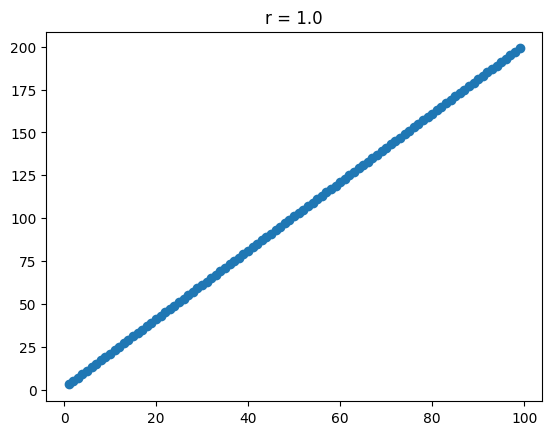

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#r = +-1, если Y = aX + b (линейная зависимость) для любых a и b
#Пример Y = 2X + 1 (r = 1)
X = np.array([i for i in range(1, 100)])
Y = np.array([(i*2 + 1) for i in X])

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = -1.0')

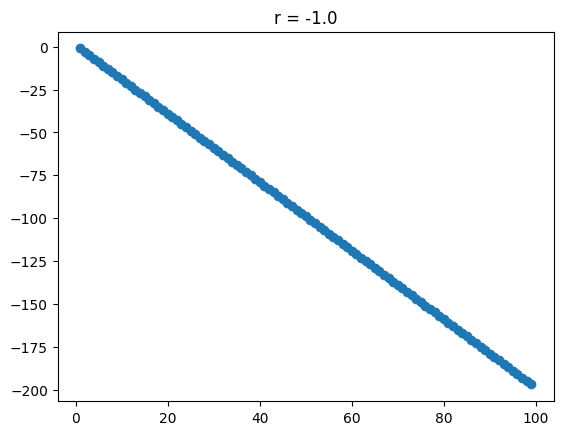

In [ ]:
#Пример Y = -2X + 1 (r = -1)
X = np.array([i for i in range(1, 100)])
Y = np.array([(i*(-2) + 1) for i in X])

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = 0.2')

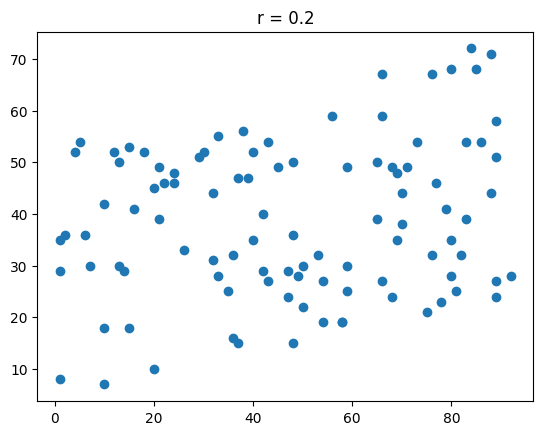

In [ ]:
# Задаем случайное семя для воспроизводимости
np.random.seed(0)
#Размер выборки
n = 100
X = np.random.randint(1, 100, size=n)  # случайные целые значения от 1 до 100
# Основная зависимость
Y_true = 0.21 * X + 30  # Линейная зависимость с некоторым смещением
# Добавляем шум (сигма, стандартное отклонение) в диапазоне от -25 до 25
noise = np.random.randint(-25, 25, n)
# Итоговая выборка Y
Y = Y_true + noise

# Округляем Y до целых чисел
Y = np.round(Y).astype(int)

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = -0.2')

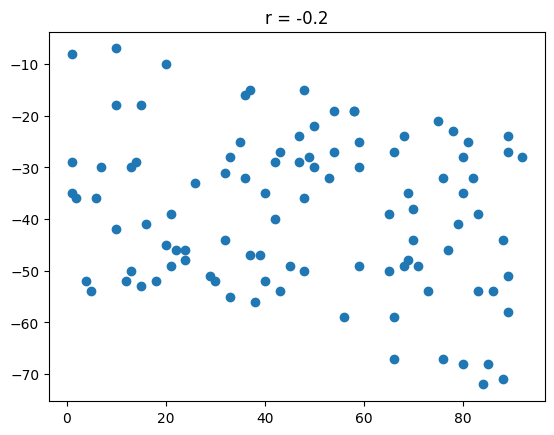

In [ ]:
Y = -Y_true - noise
Y = np.round(Y).astype(int)

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = 0.83')

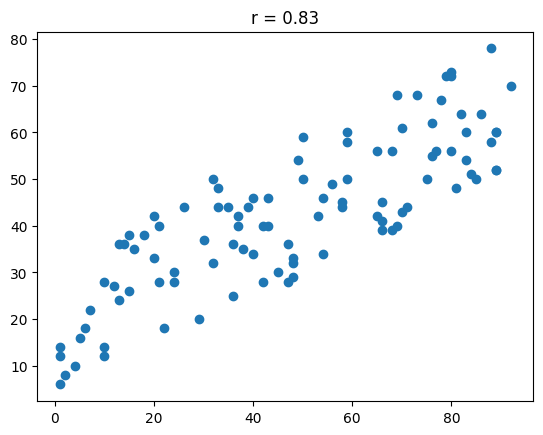

In [ ]:
# Задаем случайное семя для воспроизводимости
np.random.seed(0)
#Размер выборки
n = 100
X = np.random.randint(1, 100, size=n)
# Основная зависимость
Y_true = 0.5 * X + 20
# Добавляем шум (сигма, стандартное отклонение) в диапазоне от -15 до 15
noise = np.random.randint(-15, 15, n)
Y = Y_true + noise
Y = np.round(Y).astype(int)

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = -0.83')

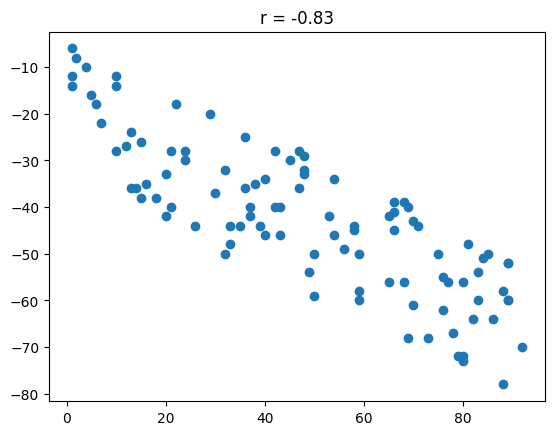

In [ ]:
Y2 = -Y_true - noise
Y2 = np.round(Y2).astype(int)

#Визуализация
plt.scatter(X, Y2)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y2)[0][1], 2)}')

Text(0.5, 1.0, 'r = 0.5')

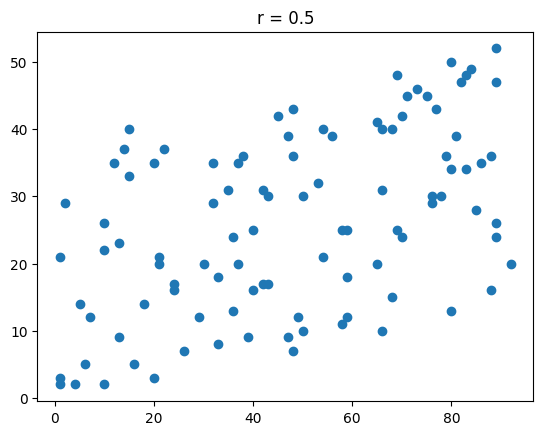

In [ ]:
np.random.seed(0)
n = 100
X = np.random.randint(1, 100, size=n)
Y_true = 0.15 * X + 20
# Добавляем шум (сигма, стандартное отклонение) в диапазоне от
noise = np.random.randint(-20, 20, n)
Y = Y_true + noise
Y = np.round(Y).astype(int)

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = -0.5')

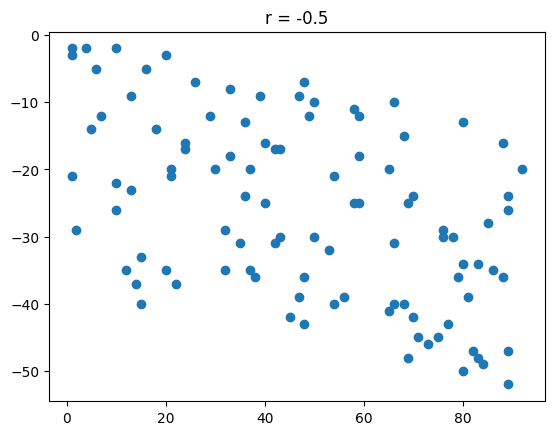

In [ ]:
Y = -Y_true - noise
Y = np.round(Y).astype(int)

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Нелинейная зависимость (свойства коэффциента корреляции)

Text(0.5, 1.0, 'r = 0.89')

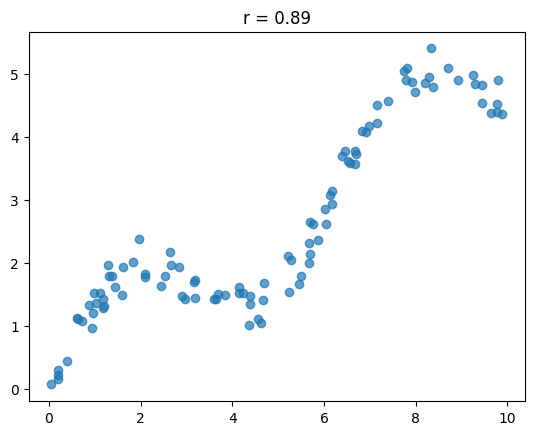

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
X = np.random.uniform(0, 10, size=n)

# Нелинейная зависимость
Y_true = np.sin(X) + 0.5 * X

# Добавляем шум
noise = np.random.normal(0, 0.2, n)
Y = Y_true + noise

# Визуализация
plt.scatter(X, Y, alpha=0.7)
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')

Text(0.5, 1.0, 'r = 0.0')

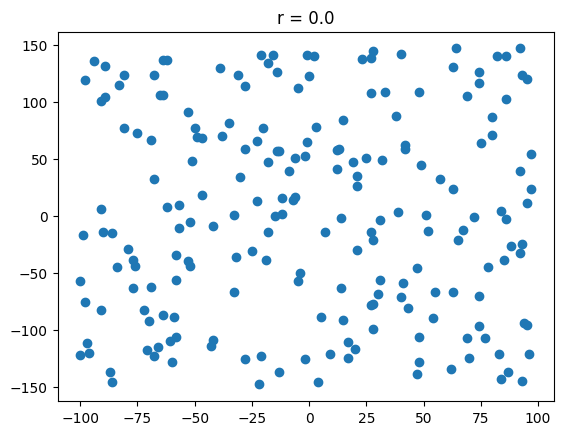

In [ ]:
np.random.seed(0)
n = 200
X = np.random.randint(-100, 100, size=n)
Y = np.random.randint(-150, 150, size=n)

#Визуализация
plt.scatter(X, Y)
#Коэффициент корреляции
plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 1)}')

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def poly_regression(x, y, n):
  model_ = PolynomialFeatures(degree=n, include_bias=False)
  poly_features = model_.fit_transform(x.reshape(-1, 1))
  poly_model = LinearRegression()
  poly_model.fit(poly_features, y)
  return poly_model.predict(poly_features), poly_model.coef_

In [ ]:
#Корреляционное отношение
def corr_ratio(x, y, n):
  E_y = np.mean(y)
  y_pred = poly_regression(x, y, n)[0]
  D_yx = np.mean((y_pred - E_y)**2)
  D_y = D_yx + np.mean((y - y_pred)**2)
  return round(D_yx / D_y, 2)

Text(0.5, 0, 'X')

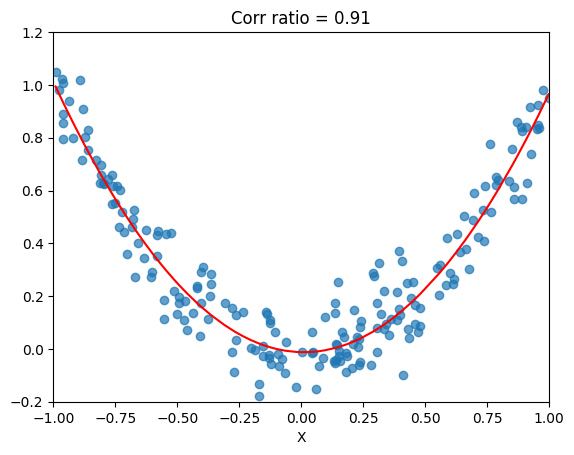

In [ ]:
import numpy as np

np.random.seed(0)
n = 200
X = np.random.uniform(-1, 1, size=n)

# Нелинейная зависимость
Y_true = X**2

# Добавляем шум
noise = np.random.normal(0, 0.1, n)
Y = Y_true + noise

#Линия регрессии
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
mod = poly_regression(X, Y, 2)
Y_pred = mod[0]
Y_pred_sorted = Y_pred[sorted_indices]

# Визуализация
plt.scatter(X, Y, alpha=0.7)
plt.plot(X_sorted, Y_pred_sorted, c='red')
#plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')
plt.title(f'Corr ratio = {corr_ratio(X, Y, 2)}')
plt.xlim(-1, 1)
plt.ylim(-0.2, 1.2)
plt.xlabel('X')

Text(0.5, 0, 'Y')

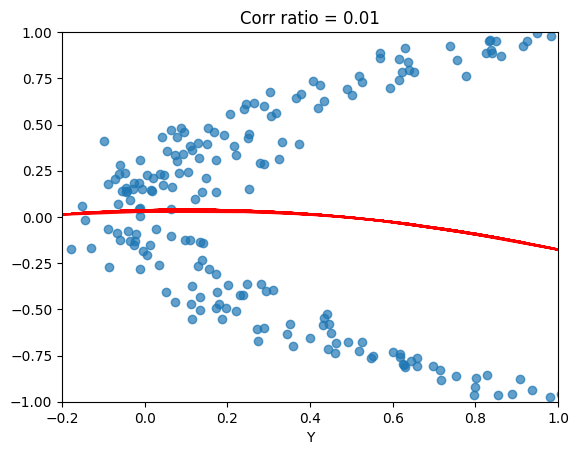

In [ ]:
#Линия регрессии
sorted_indices = np.argsort(X)
Y_sorted = Y[sorted_indices]
mod = poly_regression(Y, X, 2)
X_pred = mod[0]
X_pred_sorted = X_pred[sorted_indices]

# Визуализация
plt.scatter(Y, X, alpha=0.7)
plt.plot(Y_sorted, X_pred_sorted, c='red')
#plt.title(f'r = {round(np.corrcoef(X, Y)[0][1], 2)}')
plt.title(f'Corr ratio = {corr_ratio(Y, X, 2)}')
plt.xlim(-0.2, 1)
plt.ylim(-1, 1)
plt.xlabel('Y')

In [ ]:
print(corr_ratio(X, Y, 2)) # -----> 0.91
print(corr_ratio(Y, X, 2)) # -----> 0.01

0.91
0.01


In [ ]:
import numpy as np

np.random.seed(0)
n = 1000
mu_x, sigma_x = 0, 1
mu_y, sigma_y = 0, 1
X = np.random.normal(mu_x, sigma_x, n)
Y = 0.5 * X + np.random.normal(mu_y, sigma_y, n)

corr_ = round(corr_pearson_2(X, Y)**2, 2)
cr_ = corr_ratio(X, Y, 2)
#Res
print(f"Corr coef: {corr_}") #-----> 0.19
print(f"Corr_ratio: {cr_}")  #-----> 0.19

Corr coef: 0.19
Corr_ratio: 0.19


Text(0.5, 1.0, 'rho^2 = 1.0, r^2 = 1.0')

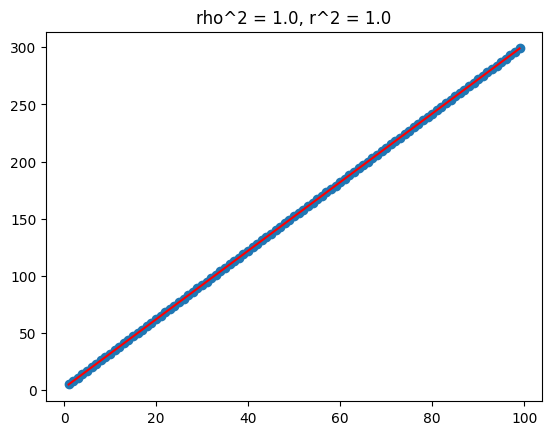

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Y = 3X + 2
X = np.array([i for i in range(1, 100)])
Y = np.array([(i*3 + 2) for i in X])
#Linear regression
mod = poly_regression(X, Y, 1)
Y_pred = mod[0]

#Visualization
plt.scatter(X, Y)
plt.plot(X, Y_pred, c='red')
plt.title(f'rho^2 = {round(np.corrcoef(X, Y)[0][1]**2, 2)}, r^2 = {corr_ratio(X, Y, 1)}')

Text(0.5, 0, 'X')

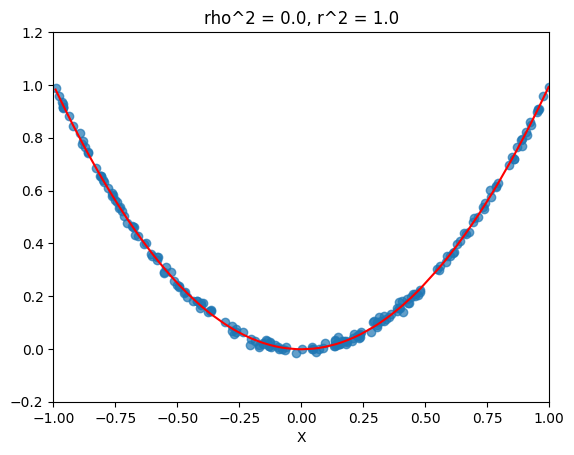

In [ ]:
import numpy as np

np.random.seed(0)
n = 200
X = np.random.uniform(-1, 1, size=n)

# Non-linear dependence
Y_true = X**2
# Noise
noise = np.random.normal(0, 0.01, n)
Y = Y_true + noise

#Regression line
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
mod = poly_regression(X, Y, 2)
Y_pred = mod[0]
Y_pred_sorted = Y_pred[sorted_indices]

#Visualization
plt.scatter(X, Y, alpha=0.7)
plt.plot(X_sorted, Y_pred_sorted, c='red')
plt.title(f'rho^2 = {round(np.corrcoef(X, Y)[0][1]**2, 2)}, r^2 = {corr_ratio(X, Y, 2)}')
plt.xlim(-1, 1)
plt.ylim(-0.2, 1.2)
plt.xlabel('X')

Text(0.5, 1.0, 'rho^2 = 0.69, r^2 = 0.69')

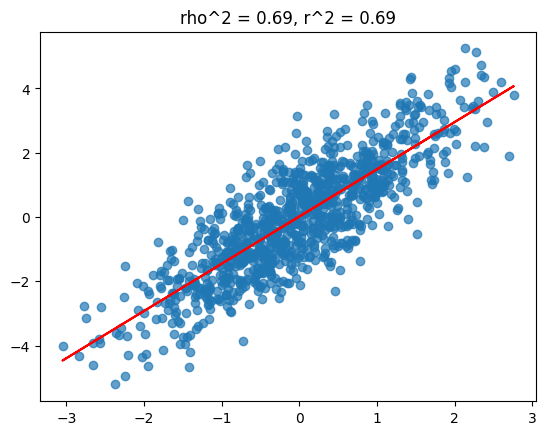

In [ ]:
import numpy as np

np.random.seed(0)
n = 1000
mu_x, sigma_x = 0, 1
mu_y, sigma_y = 0, 1
X = np.random.normal(mu_x, sigma_x, n)
Y = 1.5 * X + np.random.normal(mu_y, sigma_y, n)

#Linear regression
mod = poly_regression(X, Y, 1)
Y_pred = mod[0]

#Visualization
plt.scatter(X, Y, alpha=0.7)
plt.plot(X, Y_pred, c='red')
plt.title(f'rho^2 = {round(np.corrcoef(X, Y)[0][1]**2, 2)}, r^2 = {corr_ratio(X, Y, 1)}')